In [1]:
import tarfile
import numpy as np
import pandas as pd
import scipy

In [2]:
# open the zip file
tar_file = tarfile.open('wav.tgz', 'r')

In [3]:
# an array with the order of wav files in the feat.npy array
path = np.load('path.npy')
path.shape

(105835,)

In [4]:
# an array with Mel-frequency cepstral coefficients extracted from each wav file. 
feat = np.load('feat.npy', allow_pickle=True)
feat.shape

(105835,)

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.shape)
print(test.shape)

(94824, 2)
(11005, 1)


# Prepare MFCC features

In [7]:
# Create a dictionary from the files path and feat
zipped = zip(path, feat)
zipped_dict = dict(zipped)

In [8]:
# 1. Convert train data set into numpy array -> train.values
# 2. Create a dictionary from 1.
train_dict = dict(train.values)

In [9]:
# Create mapping between both dictionaries
map_dict = [(k, zipped_dict[k], v) for k, v in train_dict.items()]

In [13]:
# Create two empty lists before split
y_train_bs = []
X_train_bs = []

In [14]:
for i in range (len(map_dict)):
    y_train_bs.append(map_dict[i][2])
    X_train_bs.append(map_dict[i][1])

In [15]:
#Getting X an y in the right format
X = np.empty((len(X_train_bs),99,13))
row = 0
for i in X_train_bs:
    X[row, 0:len(i)] = i[0:len(i)]
    row +=1
    
y = np.array(y_train_bs)

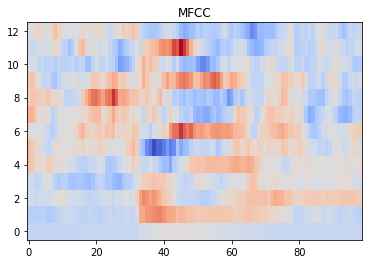

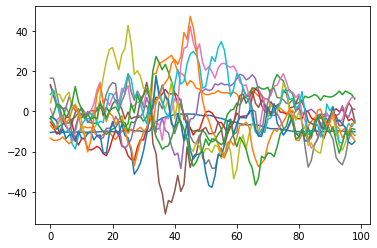

In [54]:
#plotting
from python_speech_features import mfcc
import matplotlib.pyplot as plt
from matplotlib import cm

mfcc_feat = X[1]

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)

In [22]:
#This function can add features
def features(data, functions):
#.........................................    
    loop = 0
    for function in functions:
        if loop == 0:
            new = function(data, axis=1)
        else:
            b = function(data, axis=1)
            new = np.concatenate((new, b), axis=1)
            
        loop+=1
        
    return new
    
summaries = [np.mean, np.max, np.std, np.min, np.sum]

X = features(X, summaries)

# Split train and validation data sets

In [23]:
# split the train data into train and validation. 20% of the train data is now val data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print(len(X_train))
print(len(X_val))
print(len(y_train))
print(len(y_val))

75859
18965
75859
18965


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
print(X_train.shape)
print(y_train.shape)

(75859, 65)
(75859,)


In [26]:
depths = [25,50,100]
estimators = [150, 200]

for depth in depths:
    for estimator in estimators:
        rf = RandomForestClassifier(n_estimators = estimator, max_depth=depth)
        rf.fit(X_train, y_train)
        print("max_depth=:", depth, "\t", "n_estimator=", estimator, "\t", "score =", rf.score(X_val, y_val))



KeyboardInterrupt: 